In [1]:
import pandas as pd
student_df=pd.read_csv("E:\Excelr Data\DataScience\student_info.csv")

In [2]:
student_df.head(3)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68


In [3]:
student_df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import warnings
warning.filterwarnings('ignore')
%matplotlib inline

NameError: name 'warning' is not defined

In [7]:
mean_hrs=student_df['study_hours'].mean()
mean_marks=student_df['student_marks'].mean()
print("Avg hrs study:",mean_hrs,"Avg marks:",mean_marks)

Avg hrs study: 6.9959487179487185 Avg marks: 77.93375000000003


In [8]:
student_df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
student_df['study_hours']=student_df['study_hours'].fillna(mean_hrs)

In [10]:
student_df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
mean_hrs=student_df['study_hours'].mean()
mean_marks=student_df['student_marks'].mean()
print("Avg hrs study:",mean_hrs,"Avg marks:",mean_marks)

Avg hrs study: 6.9959487179487185 Avg marks: 77.93375000000003


In [12]:
#target variable y - marks
#response variable x - hours


In [13]:
X=pd.DataFrame(student_df['study_hours'])
y=student_df['student_marks']

In [14]:
X.shape, y.shape

((200, 1), (200,))

<Axes: xlabel='study_hours', ylabel='student_marks'>

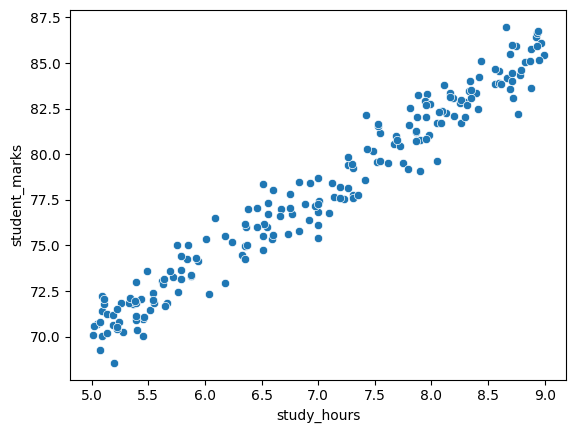

In [15]:
sns.scatterplot(x='study_hours',y='student_marks', data=student_df)

Text(0, 0.5, 'student study marks')

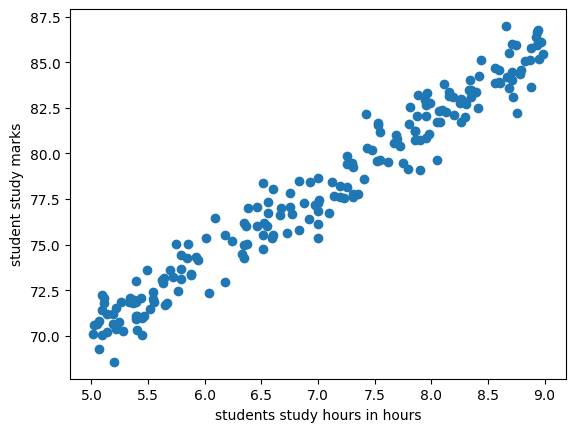

In [16]:
plt.scatter(X,y)
plt.xlabel('students study hours in hours')
plt.ylabel('student study marks')

In [17]:
corr=student_df['study_hours'].corr(student_df['student_marks'])

In [18]:
# if value >0.5 strongly related and if <5 not stongly related
corr

0.9786955883159015

In [19]:
# Simple Linear Regression Analysis

In [20]:
Linear_model = LinearRegression()
Linear_model.fit(X,y)

LinearRegression()

In [21]:
R2=Linear_model.score(X,y)
print(f'R2 score is {round(R2,2)}')

R2 score is 0.96


In [22]:
#R2 score is high so we can go for prediction

In [23]:
st_hr=np.array(int(input('Enter:How many hours for daily you study: ')),ndmin=2)

if st_hr<=0 or st_hr>10:
    print('Give the hours between 1 to 10')
else:
    scor_marks=Linear_model.predict(st_hr)
    print(f'If you study for {st_hr[0,0]} You will score {round(scor_marks[0],2)}%')

Enter:How many hours for daily you study: 


ValueError: invalid literal for int() with base 10: ''

In [24]:
# Loading and Fitting the linear equation model from statsmodels library

In [25]:
import statsmodels.api as sm
mlr_model=sm.OLS(y, X).fit()  # Ordinary list Square method
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.987    
Dependent Variable:     student_marks    AIC:                         1442.2349
Date:                   2024-07-18 09:26 BIC:                         1445.5333
No. Observations:       200              Log-Likelihood:              -720.12  
Df Model:               1                F-statistic:                 1.526e+04
Df Residuals:           199              Prob (F-statistic):          4.77e-190
R-squared (uncentered): 0.987            Scale:                       78.910   
----------------------------------------------------------------------------------
                    Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
study_hours        10.9212      0.0884    123.5155    0.0000    10.7469    11.0956
-------------------------------------------------------------------------------
Omnibus:                   178.099           Durbin-Watson:              2.037 
Prob(Omnibus):             0.000             Jarque-Bera (JB):           14.346
Skew:                      0.078             Prob(JB):                   0.001 
Kurtosis:                  1.697             Condition No.:              1     
===============================================================================

"""

In [26]:
X=sm.add_constant(X)
mlr_model=sm.OLS(y, X).fit()  # Ordinary list Square method
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.958    
Dependent Variable: student_marks    AIC:                575.0788 
Date:               2024-07-18 09:26 BIC:                581.6754 
No. Observations:   200              Log-Likelihood:     -285.54  
Df Model:           1                F-statistic:        4499.    
Df Residuals:       198              Prob (F-statistic): 4.19e-138
R-squared:          0.958            Scale:              1.0280   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         50.6744    0.4127  122.7931  0.0000  49.8606  51.4882
study_hours    3.8965    0.0581   67.0743  0.0000   3.7819   4.0110
------------------------------------------------------------------
Omnibus:              0.157         Durbin-Watson:           1.905
Prob(Omnibus):        0.924         Jarque-Bera (JB):        0.230
Skew:                 -0.065        Prob(JB):                0.891
Kurtosis:             2.896         Condition No.:           42   
==================================================================

"""

In [27]:
R2_scor=mlr_model.rsquared
print(round(R2_scor,2))

0.96


In [28]:
st_hr=np.array(int(input('Enter:How many hours for daily you study: ')))

if st_hr<=0 or st_hr>10:
    print('Give the hours between 1 to 10')
else:
    scor_marks=mlr_model.predict([[1,st_hr]])
    print(f'If you study for {st_hr} You will score {round(scor_marks[0],2)}%')

Enter:How many hours for daily you study: 


ValueError: invalid literal for int() with base 10: ''

In [29]:
import pandas as pd
mtcars=pd.read_csv("E:\Excelr Data\DataScience\mtcars.csv")

In [30]:
mtcars.head(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4


In [31]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


C:\Users\SUJATA\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


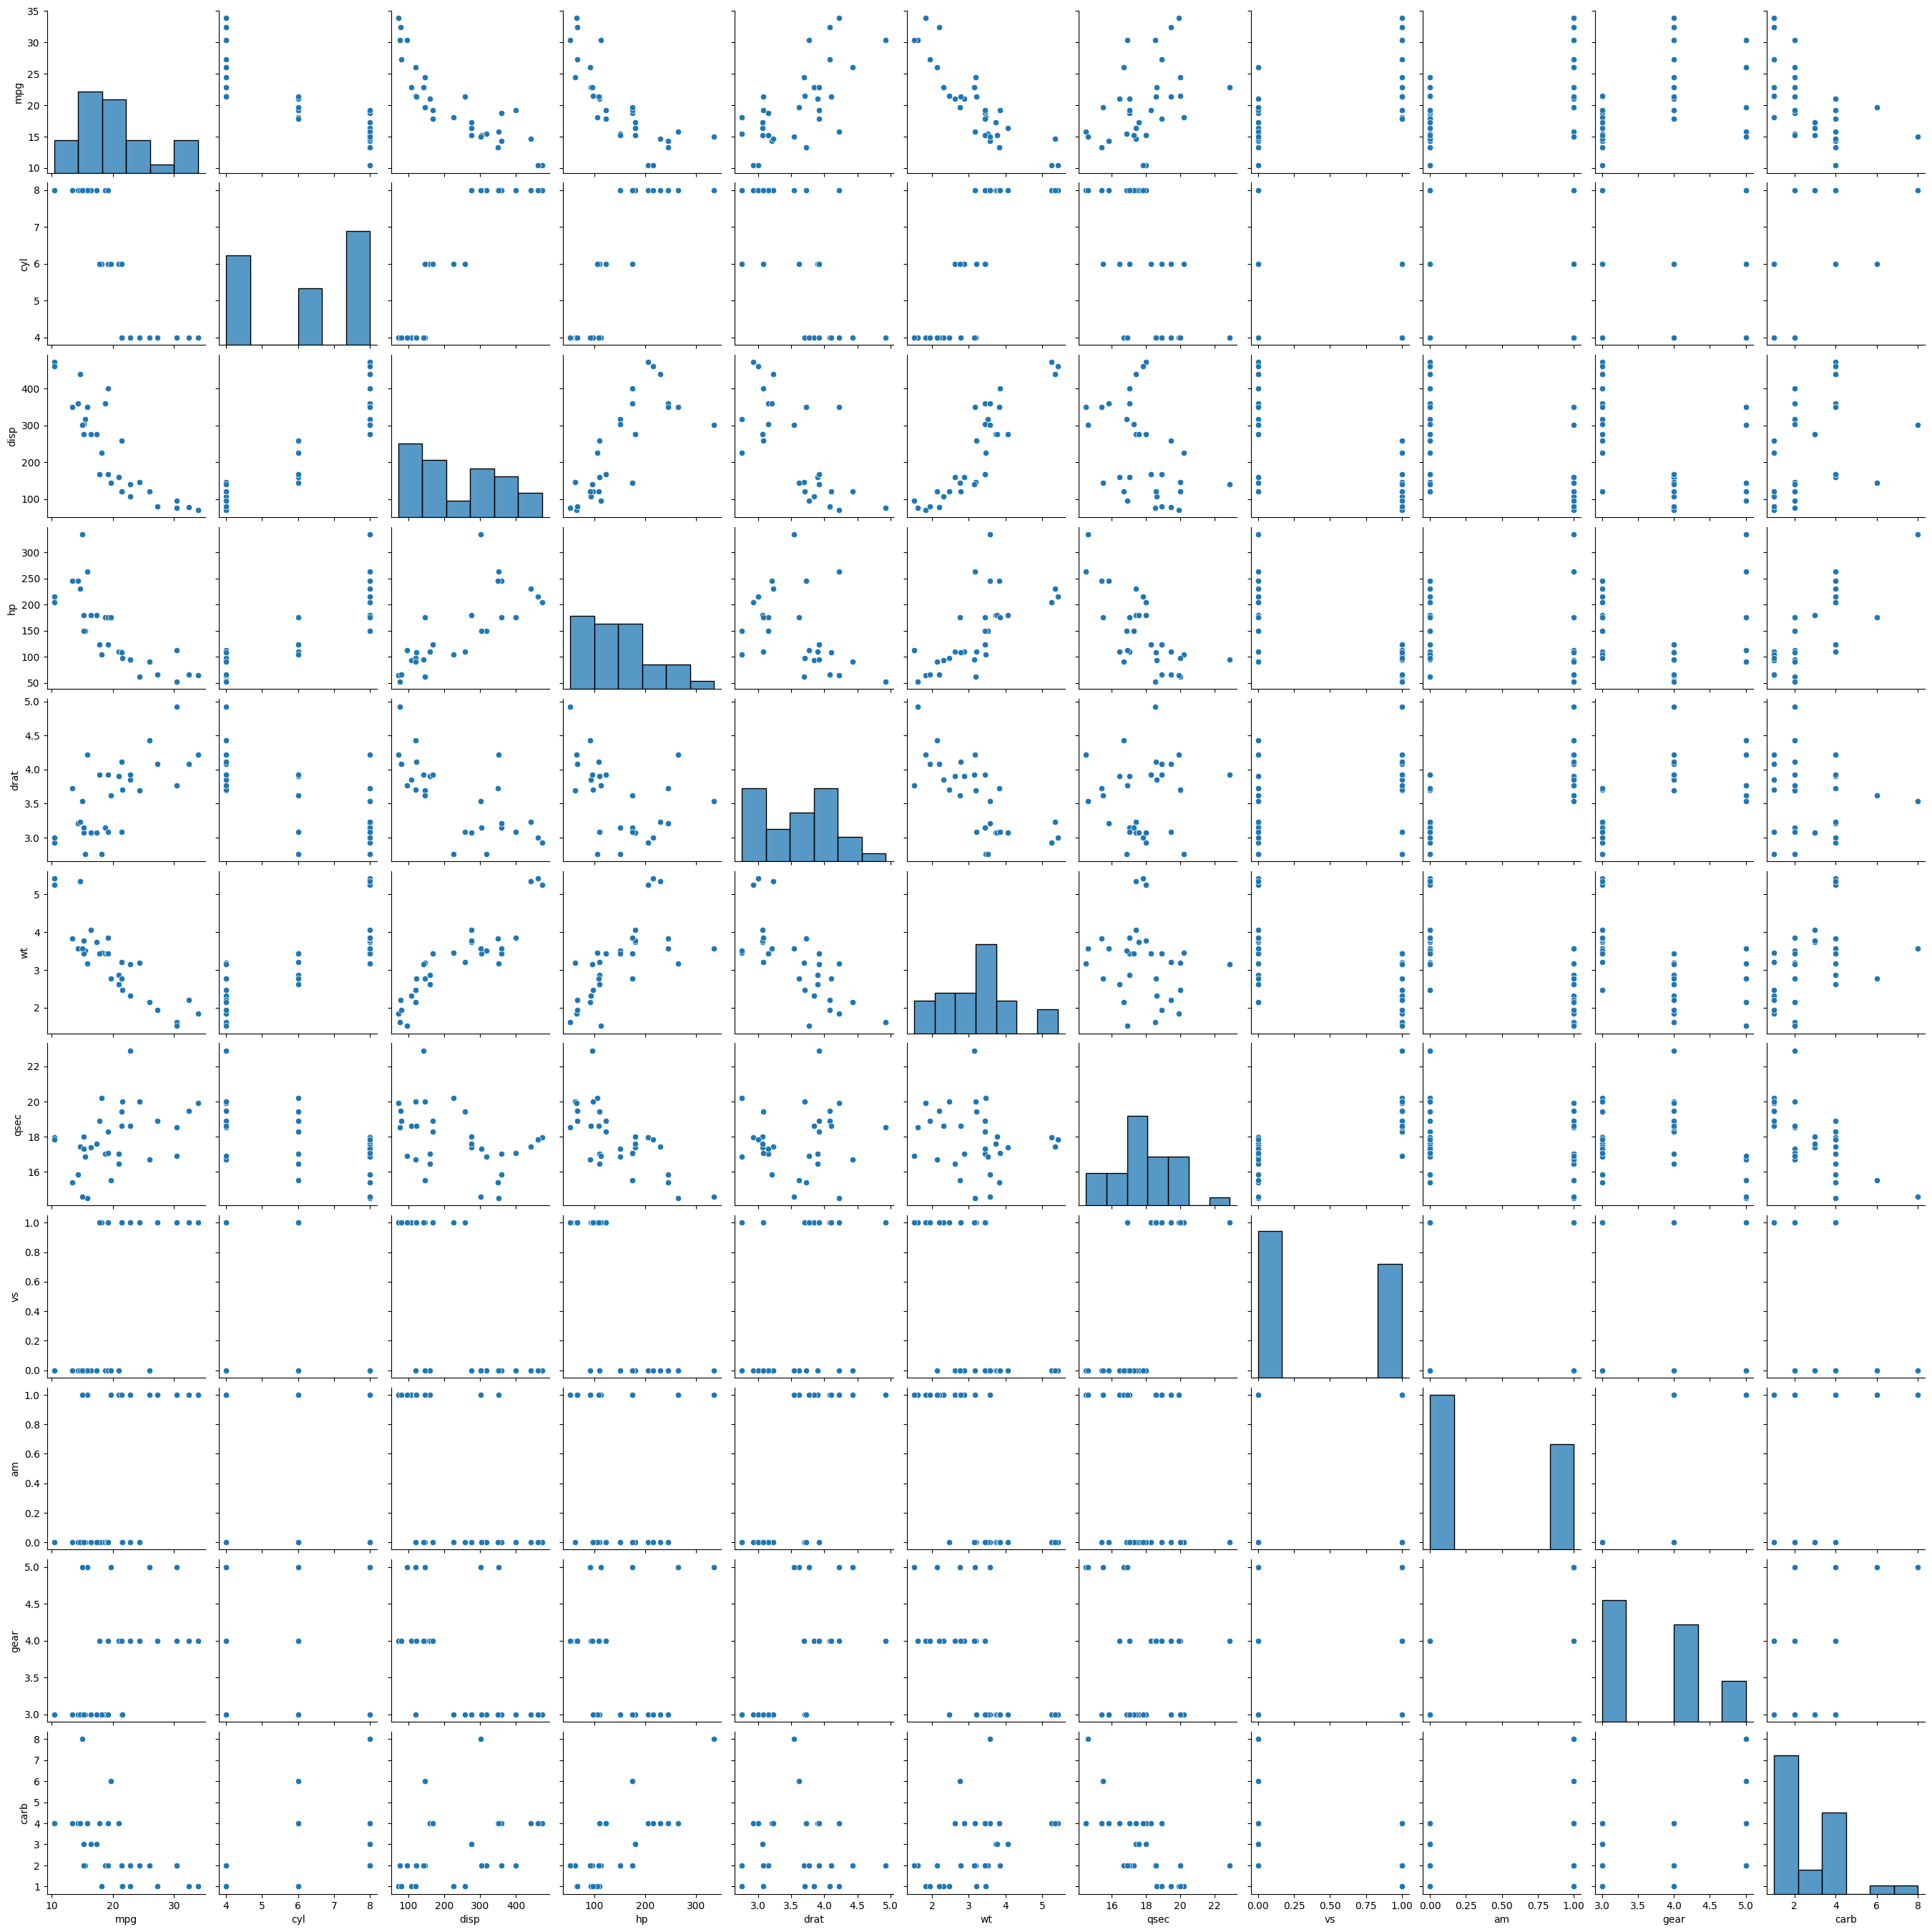

In [32]:
sns.pairplot(mtcars)

C:\Users\SUJATA\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='wt', ylabel='mpg'>

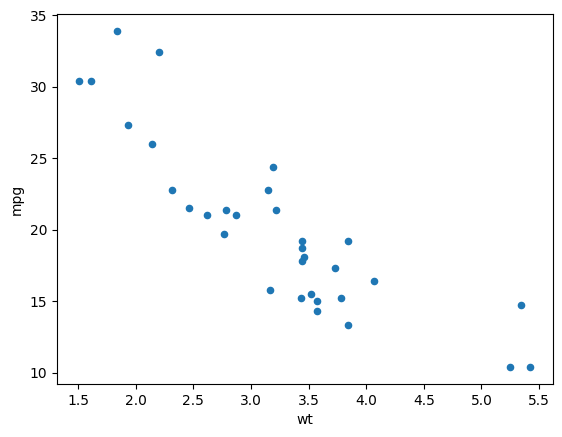

In [33]:
mtcars.plot(kind='scatter',x="wt",y='mpg')

In [34]:
mtcars['mpg'].corr(mtcars['wt'])

-0.8676593765172281

In [35]:
mtcarscars[["mpg","wt"]].describe()

NameError: name 'mtcarscars' is not defined

In [ ]:
# Model fitting
y=mtcars['mpg']
x=mtcars['wt']
x=sm.add_constant(x) #statsmodel lobarary
x.head(3)

In [ ]:
y.shape, x.shape

In [ ]:
model_sm=sm.OLS(y,x).fit()
print(model_sm.summary2())

In [ ]:
model_sm.rsquared

In [ ]:
#Fitting model using Scikit-learn

In [ ]:
from sklearn import linear_model
regression_model=linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(mtcars["wt"]),y=y)
# from trained model
print("intercept:", regression_model.intercept_)
print("Coeff:", regression_model.coef_)
#Check for R^2 value
regression_model.score(X=pd.DataFrame(mtcars["wt"]),y=mtcars["mpg"])


In [ ]:
pred=regression_model.predict(X=[[3.5],[4],[5],[6]])
print(pred)

In [ ]:
train_prediction=regression_model.predict(X=pd.DataFrame(mtcars["wt"]))
print(train_prediction)

In [ ]:
mtcars_WM=mtcars[["wt","mpg"]]
mtcars_WM['Predicted MPG']=pd.DataFrame(train_prediction)


In [ ]:
mtcars_WM

In [ ]:
mtcars.plot(kind="scatter", x="wt", y="mpg", color="black", xlim=(1,7), ylim=(5,40))
plt.plot(mtcars["wt"],train_prediction, color="blue")

In [ ]:
error_sm=model_sm.resid
error_sm
print(round(sum(error_sm**2),2))

In [ ]:
error_sm.plot(kind="kde")

In [ ]:
residuals=y-train_prediction
data=pd.DataFrame({'actual_y':y,
                  'predicted_y':train_prediction,
                  'error1':error_sm,
                  'error2':residuals})
print(data)

In [ ]:
# Polynomial Regression Analysis
poly_model = linear_model.LinearRegression()
predictors_X=pd.DataFrame([mtcars['wt'],
                          mtcars['wt']**2,
                          mtcars['wt']**3,
                          mtcars['wt']**4,
                          mtcars['wt']**5,
                          mtcars['wt']**6]).T
#include weight squired, T- transpose(columnwise to rowwise)
poly_model.fit(X=predictors_X, y=y)

print("intercept:",poly_model.intercept_)
print("coeff:",poly_model.coef_)
print("Model Accuracy:", poly_model.score(X=predictors_X, y=mtcars["mpg"]))


In [ ]:
poly_line_range=np.arange(1.5,4.7,0.1)
poly_predictors=pd.DataFrame([poly_line_range,
                             poly_line_range**2,
                             poly_line_range**3,
                             poly_line_range**4,
                             poly_line_range**5,
                             poly_line_range**6]).T
y_values=poly_model.predict(X=poly_predictors)
mtcars.plot(kind="scatter",x="wt",y="mpg",figsize=(6,6),color="Green", xlim=(0,7))
plt.plot(poly_line_range,
        y_values,
        color="blue")

In [ ]:
residuals_poly=y-y_values
plt.scatter(y=residuals_poly,x=y_values)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [ ]:
mtcars=pd.read_csv("E:\Excelr Data\DataScience\mtcars.csv")
print(mtcars.columns)

In [ ]:
#Drop target variable
X_features=mtcars.drop(['mpg'], axis=1)
X_features.head()

In [ ]:
X_features.shape

In [ ]:
X_features.dtypes

In [ ]:
## add contant intercept term 1 to dataset
X=sm.add_constant(X_features)
X.head()

In [ ]:
y=mtcars['mpg']
y.head()

In [ ]:
#spliting data into train and test
train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2, random_state=1000)
print(len(mtcars))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

In [ ]:
#fit the regression model
mlr_model=sm.OLS(train_y,train_X).fit()
mlr_model.rsquared

In [ ]:
mlr_model.summary2()

In [ ]:
sm.__version__

In [ ]:
mlr_model.summary()

In [ ]:
corr=X_features.corr()
sns.heatmap(corr, annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif is used for finding corrilated variables
def calc_vif(X):
    vif=pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(X)

In [ ]:
#Choosing <10 VIF values feature
X_new=X.drop(['cyl','disp'],axis=1)
X_new.head(2)

In [ ]:
calc_vif(X_new)

In [ ]:
mlr_model_2=sm.OLS(y,X_new).fit()
print('MLR_Modle:', mlr_model.rsquared)
print('MLR_Modle:', mlr_model.rsquared_adj)
print('MLR_Modle_2:', mlr_model_2.rsquared)
print('MLR_Modle_2:', mlr_model_2.rsquared_adj)

In [ ]:
mlr_model_2.summary()

In [ ]:
#Choosing <10 VIF values feature
X_new1=X.drop(['cyl','disp','hp'],axis=1)
X_new1.head(2)

In [ ]:
mlr_model_3=sm.OLS(y,X_new1).fit()
print('MLR_Modle:', mlr_model.rsquared)
print('MLR_Modle:', mlr_model.rsquared_adj)
print('MLR_Modle_2:', mlr_model_2.rsquared)
print('MLR_Modle_2:', mlr_model_2.rsquared_adj)
print('MLR_Modle_3:', mlr_model_3.rsquared)
print('MLR_Modle_3:', mlr_model_3.rsquared_adj)

In [ ]:
mlr_model_3.summary()

## Residual Analysis

In [ ]:
mlr_model.resid

In [ ]:
#extracting residual values for all 3 modules

Residual1 = mlr_model.resid
Residual2 = mlr_model_2.resid
Residual3 = mlr_model_3.resid
# kde plot
sns.kdeplot(Residual1, label="1st model")
sns.kdeplot(Residual2, label="2nd model")
sns.kdeplot(Residual3, label="3rd model")

plt.legend()
plt.show()

#green one is more normaly distributed

In [ ]:
# QQ plot
qqplot=sm.qqplot(Residual1, line='q')
qqplot=sm.qqplot(Residual3, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
#pp plot
pplot=sm.ProbPlot(Residual1)
pplot1=sm.ProbPlot(Residual3)
fig=pplot.ppplot()
fig=pplot1.ppplot()
plt.title("Probability Plot for Normality")
plt.show()


In [ ]:
#Residual plot
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, c='r')
plt.scatter(mlr_model_3.fittedvalues, mlr_model_3.resid, c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

## Data Transformation

In [ ]:
#standerdization method
def standardized_values(vals):
    return (vals-vals.mean())/vals.std()
    

In [ ]:
X_standr=standardized_values(X_new)
print(X_standr)

In [ ]:
X_standr.describe()

In [ ]:
X_standr=X_standr.drop(['const'],axis=1)

In [ ]:
X_standr=sm.add_constant(X_standr)
y_stdndr=standardized_values(y)
y_stdndr

In [ ]:
# fir the regression model
mlr_model_4 = sm.OLS(y_stdndr,X_standr).fit()
print("MLR_model_4:", mlr_model_4.rsquared)
print("MLR_model_4:", mlr_model_4.rsquared_adj)
print("MLR_model_3:", mlr_model_3.rsquared)

In [ ]:
min(mlr_model_4.resid), max(mlr_model_4.resid)

In [ ]:
plt.scatter(mlr_model_4.fittedvalues, mlr_model_4.resid, c='r')
plt.scatter(mlr_model_3.fittedvalues, mlr_model_3.resid, c='g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

## Outlier Analysis:

In [ ]:
sm_model=sm.regression.linear_model.OLS(y_stdndr,X_standr).fit()
influence=sm_model.get_influence()
print(influence.cooks_distance)

In [ ]:
influence_list=influence.cooks_distance[0]
print(len(influence_list))

In [ ]:
influence_df=pd.DataFrame(influence_list,columns=["influence"])
influence_df.index=X_standr.index
cooks_df=X_standr.merge(influence_df,left_index=True, right_index=True)
cooks_df

In [ ]:
#setting the threshold and getting the outliers
original_length=len(X_standr)
cooks_threshold=4/original_length
print(cooks_threshold)

In [ ]:
cooks_outliers=cooks_df[cooks_df["influence"]>cooks_threshold]
cooks_outliers.sort_values(by=["influence"])
print(cooks_outliers)
print("Removed:",len(cooks_outliers))
print(f"This is {cooks_threshold*100}% of our dataset")

In [ ]:
plt.stem(np.arange(len(X_standr)), np.round(influence_list, 3), markerfmt='*')
plt.show()

In [ ]:
X_standr.shape

In [ ]:
#leverage value / influencing points
K=X_standr.shape[1]
n=X_standr.shape[0]
leverage_cutoff=3*((K+1)/n)
print("Number of VAriable:",K,"and number of observations:",n)
print("Cut of leverage value:", round(leverage_cutoff,3))


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax= plt.subplots(figsize=(8,6))
influence_plot(mlr_model_4, ax=ax)
plt.show()

In [ ]:
X_standr_out=X_standr.drop(X_standr.index[[16,8,26,27]], axis=0).reset_index()


In [ ]:
X_standr_out=X_standr_out.drop(["index"], axis=1)
print(len(X_standr_out))

In [ ]:
y_stdndr_out=y_stdndr.drop(y_stdndr.index[[8,16,26,27]],axis=0).reset_index()
y_stdndr_out=y_stdndr_out.drop(['index'],axis=1)
len(y_stdndr_out)

In [ ]:
X_standr_out.shape, y_stdndr_out.shape

In [ ]:
X_standr_out=X_standr_out.drop(["hp"],axis=1)



In [ ]:
X_standr_out.head(2)

In [ ]:
mlr_model_4=sm.OLS(y_stdndr_out, X_standr_out).fit()
print(mlr_model_4.rsquared)
print(mlr_model_4.rsquared_adj)

In [ ]:
mlr_model_4.summary()

## Data transformation for testing data


In [ ]:
test_X=test_X.drop(['cyl','disp'], axis=1)

In [ ]:
test_X.shape

In [ ]:
test_X=standardized_values(test_X)
test_X=test_X.drop(['const'],axis=1)


In [ ]:
test_X=sm.add_constant(test_X)
test_X

In [ ]:
test_y=standardized_values(test_y)
test_y.shape

## Prediction on testing Data

In [ ]:
y_pred=mlr_model_4.predict(test_X)
y_pred

## Evaluation metrics

In [ ]:
mse=(test_y-y_prep)**2 # Mean Absolute Error
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

mae=np.abs(test_y-y_prep) # Mean Squared Error
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse=np.sqrt(mse.mean()) # Root Mean Aquared Error
print(f"RMSE: {rmse:0.2f} )")

SE_line=sum((test_y-y_pred)**2)
SE_mean=sum((test_y-test_y.mean())**2)
r2=1-(SE_line/SE_mean)
print(f"R^2 coefficient of determination: {r2:0.2f}%")



In [ ]:
Lasso Regressor

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [4]:
dataset=fetch_california_housing()
X=dataset['data']
y=dataset['target']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=15)


HTTPError: HTTP Error 403: Forbidden

In [3]:
dataset

NameError: name 'dataset' is not defined

In [47]:
dataset=pd.read_csv("E:\Excelr Data\DataScience\housing.csv")

In [48]:
dataset.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
y.shape, X.shape

((20640,), (20640, 8))

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
means=dataset['total_bedrooms'].mean()

In [52]:
dataset['total_bedrooms'].fillna(means,inplace=True)

In [53]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [54]:
y=dataset["median_house_value"]

In [55]:
X=dataset.drop(["median_house_value","ocean_proximity"], axis=1)

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=15)

In [57]:
#Linear regression
LR=LinearRegression()
LR.fit(X_train, y_train)
train_score_LR=LR.score(X_train, y_train)
print("The train score for lasso model is {}".format(train_score_LR))

The train score for lasso model is 0.63700302397544


In [58]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
437,-122.30,37.87,10.0,503.0,118.0,228.0,100.0,2.1705
16133,-122.49,37.78,32.0,3028.0,815.0,1704.0,718.0,3.2028
11198,-117.91,33.84,26.0,1156.0,393.0,1880.0,400.0,2.2716
3452,-118.42,34.31,19.0,6755.0,1443.0,4205.0,1395.0,3.9583
5617,-118.26,33.79,42.0,1162.0,264.0,1044.0,241.0,3.5488
...,...,...,...,...,...,...,...,...
16247,-121.27,37.98,43.0,1005.0,200.0,492.0,172.0,2.6812
2693,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558
8076,-118.19,33.83,30.0,2246.0,552.0,1032.0,548.0,3.5871
20213,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333


In [59]:
# Lasso regression model
print("\n ................Lasso Model......................")
lasso=Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
train_score_ls = lasso.score(X_train, y_train)
print("The train score for lasso model is {}".format(train_score_ls))



 ................Lasso Model......................
The train score for lasso model is 0.6370030239702078


In [60]:
#Ridege regression model
print("\n Ridge Model...........................\n")
ridgeReg=Ridge(alpha=0.1)
ridgeReg.fit(X_train, y_train)
train_score_ridge=ridgeReg.score(X_train, y_train)
print("The train score for ridge model is {}".format(train_score_ridge))



 Ridge Model...........................

The train score for ridge model is 0.6370030239409876


In [61]:
#ElasticNet Regression Model
enet_model=ElasticNet(alpha=0.1).fit(X_train,y_train)
train_enet_score=enet_model.score(X_train,y_train)

In [62]:
# Testing a model on testing data set
LR_test_score=LR.score(X_test,y_test)
lasso_test_score=lasso.score(X_test,y_test)
Ridge_test_score=ridgeReg.score(X_test,y_test)
enet_test_score=enet_model.score(X_test,y_test)
result=pd.DataFrame({'LR score':[train_score_LR,LR_test_score],
                    'Lasso score':[train_score_ls,lasso_test_score],
                    'Ridege score':[train_score_ridge,Ridge_test_score],
                     'Enet score':[train_enet_score, enet_test_score]},
                   index=["Train Score", "Test Score"])

In [63]:
print(result)

             LR score  Lasso score  Ridege score  Enet score
Train Score  0.637003     0.637003      0.637003    0.635333
Test Score   0.629530     0.629530      0.629530    0.626684


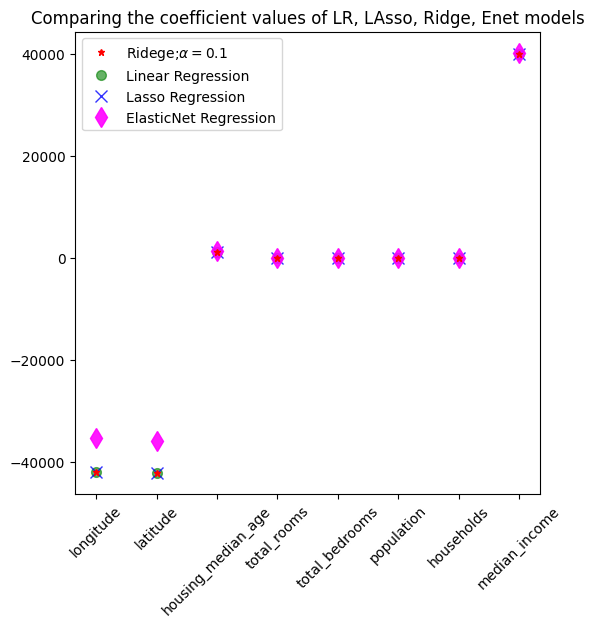

In [64]:
#Lets plot the coefficients for both the linear and ridge models.
plt.figure(figsize=(6,6))
plt.plot(X.columns, ridgeReg.coef_,alpha=1,linestyle='none',
        marker='*',markersize=5, color='red',label=r'Ridege;$\alpha=0.1$',zorder=7)

plt.plot(X.columns, LR.coef_,alpha=0.6,linestyle='none',
        marker='o',markersize=7, color='green',label='Linear Regression')

plt.plot(X.columns, lasso.coef_,alpha=0.8,linestyle='none',
        marker='x',markersize=9, color='blue',label='Lasso Regression')

plt.plot(X.columns, enet_model.coef_,alpha=0.9,linestyle='none',
        marker='d',markersize=10, color='magenta',label='ElasticNet Regression')

plt.xticks(rotation=45)
plt.title("Comparing the coefficient values of LR, LAsso, Ridge, Enet models")
plt.legend()
plt.show()

## Using Cross Validation

In [65]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [68]:
#Lasso Cross Validation
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV
lasso_cv=LassoCV(alphas=[0.0001, 0.0002, 0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01,0.1,1,10],
                random_state=10).fit(X_train,y_train)
#
print(f'training score:{lasso_cv.score(X_train,y_train)}')
print(lasso_cv.alpha_)

training score:0.63700297165533
10.0


In [69]:
#Ridge Cross Validation
#Using the linear CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50,100,150],
                    ).fit(X_train, y_train)
#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print(ridge_cv.alpha_)

The train score for ridge model is 0.6370030203263297
1.0


In [70]:
#Using the ElasticNetCV CV model
from sklearn.linear_model import ElasticNetCV

#ElasticNetCV Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.0001, 0.001,0.002,0.0025,0.003,0.035,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(X_train, y_train)))
ElasticNet_cv.alpha_

The train score for elasticnetCV model is 0.6370027900075649


0.001

In [71]:
np.log(4)

1.3862943611198906

In [90]:
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)

array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])

In [91]:
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [119]:
alphas = np.logspace(-4, 6, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas): 
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
print(scores)
print(alphas)

[0.62952994 0.62952994 0.62952993 0.6295298  0.62952813 0.62950599
 0.62911512 0.60656225 0.37713347 0.1033059 ]
[1.00000000e-04 1.29154967e-03 1.66810054e-02 2.15443469e-01
 2.78255940e+00 3.59381366e+01 4.64158883e+02 5.99484250e+03
 7.74263683e+04 1.00000000e+06]


33771.25390376377


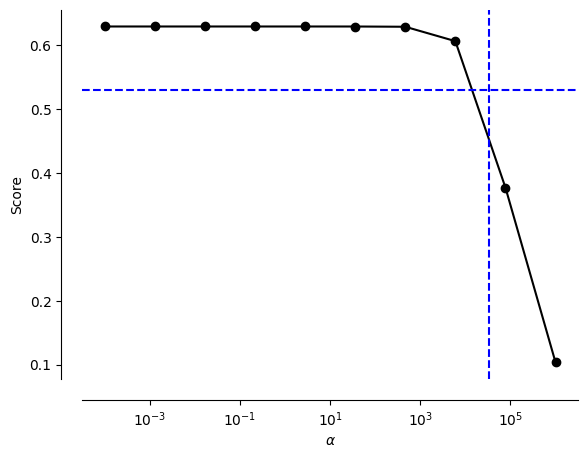

In [120]:
# comparing alpha values with scores
lassocv = LassoCV(random_state=0)
lassocv.fit(X, y,)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

## Model Tuning

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2) 
print(cv_results)

{'fit_time': array([0.06860304, 0.16833115, 0.08272791, 0.06623507, 0.13329601]), 'score_time': array([0.00498652, 0.00465345, 0.00413203, 0.00524378, 0.00504017]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-03, 8.53167852e-03,
       1.74332882e-02, 3.56224789e-02, 7.27895384e-02, 1.48735211e-01,
       3.03919538e-01, 6.21016942e-01, 1.26896100e+00, 2.59294380e+00,
       5.29831691e+00, 1.08263673e+01, 2.21221629e+01, 4.52035366e+01,
       9.23670857e+01, 1.88739182e+02, 3.85662042e+02, 7.88046282e+02,
       1.61026203e+03, 3.29034456e+03, 6.72335754e+03, 1.37382380e+04,
       2.80721620e+04, 5.73615251e+04, 1.17210230e+05, 2.39502662e+05,
       4.89390092e+05, 1.00000000e+06])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-

In [132]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.65222802 0.64047977 0.64165837 0.60747812 0.63767617]
R2 score: 0.636 ± 0.015


In [135]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(Normalizer(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2) 
print(cv_results)

{'fit_time': array([0.15411949, 0.16085863, 0.14211845, 0.14411116, 0.13094401]), 'score_time': array([0.00474405, 0.00498748, 0.00399017, 0.00398803, 0.00403476]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.17531894e-03, 8.53167852e-03,
       1.74332882e-02, 3.56224789e-02, 7.27895384e-02, 1.48735211e-01,
       3.03919538e-01, 6.21016942e-01, 1.26896100e+00, 2.59294380e+00,
       5.29831691e+00, 1.08263673e+01, 2.21221629e+01, 4.52035366e+01,
       9.23670857e+01, 1.88739182e+02, 3.85662042e+02, 7.88046282e+02,
       1.61026203e+03, 3.29034456e+03, 6.72335754e+03, 1.37382380e+04,
       2.80721620e+04, 5.73615251e+04, 1.17210230e+05, 2.39502662e+05,
       4.89390092e+05, 1.00000000e+06])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 2.04335972e-03, 4.175318

In [137]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.20192022 0.18404543 0.17918609 0.1783344  0.17837289]
R2 score: 0.184 ± 0.009


In [138]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 6, num=30)
model = make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2) 
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.65223205 0.64049611 0.64172282 0.60752675 0.63770734]
R2 score: 0.636 ± 0.015


C:\Users\SUJATA
